# Binning function

In [17]:
import pandas as pd 
import numpy as np 
from astropy import table
from scipy import stats
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit
import time
from scipy.interpolate import interp1d
from astropy.io import ascii

start = time.time()


##In angstroms
resolution = 20


def bin_spectra(spectrum, resolution):
    
    
    lam = spectrum[:,0]
    flux = spectrum[:,1]
   
    if lam[1]-lam[0] >= 20:
        bin_spectra = spectrum
        
    else:     
        
        number_of_bins = np.math.floor((lam[-1]-lam[0]) / resolution )
            
        #Binning
        flux_bin, bin_edge, index = scipy.stats.binned_statistic(lam, flux, statistic='mean', bins = number_of_bins)
           
        #Takes the mean of the edges of the bin in order to plot the binned spectrum
        bin_wavelength = [ (bin_edge[i]+ bin_edge[i+1])/2 for i in range(len(bin_edge)-1) ]
         
        #Make a table with the     
        bin_spectra = table.Table()
        flux_bin   = np.array(flux_bin)
        flux_bin = flux_bin/(np.median(flux_bin))
        bin_spectra['lam_bin'] = bin_wavelength
        bin_spectra['bin_flux'] = flux_bin
            
        
           
        bin_wavelength = np.array(bin_wavelength)
        
        #temp_interp  = interpolate.interp1d(bin_wavelength, flux_bin,  bounds_error=False, fill_value=np.nan)
        
    return bin_spectra

end = time.time()
print(end - start)




0.0002620220184326172


In [8]:
spectrum = np.loadtxt("/Users/user/Desktop/ssf/superfit/gal/poggianti/Sb_bianca")
#result= bin_spectra(spectrum,20)
print(result)


None


In [50]:
#Reading Spectra
import glob


templates_gal = glob.glob('gal/*')
templates_gal = [x for x in templates_gal if 'CVS' not in x and 'README' not in x]
templates_gal = np.array(templates_gal)

templates_sn = glob.glob('sne/**/*')
templates_sn = [x for x in templates_sn if 'CVS' not in x and 'README' not in x]
templates_sn = np.array(templates_sn)

print(templates_gal)

['gal/Sc' 'gal/SB3' 'gal/SB4' 'gal/SB5' 'gal/SB2' 'gal/Sb.dat' 'gal/Sa'
 'gal/S0' 'gal/SB1' 'gal/SB6' 'gal/E']


In [10]:
#Binning SN data

from astropy import table
import numpy as np 
import astropy
from scipy import stats
import scipy

resolution = 20
for i in templates_sn:
    
    print(i)
    spectrum=np.loadtxt(i)
    result = bin_spectra(spectrum,resolution)
    np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/{0}".format(i) ,result)    
    


sne/II/sn2005db.p86.dat
sne/II/sn1997cy.u31.dat
sne/II/sn2005cs.p14.dat
sne/II/sn1987a.m84.dat
sne/II/sn2004et.p47.dat
sne/II/sn2005cs.p01.dat
sne/II/sn2008ax.p35.dat
sne/II/sn1986I.p50.dat
sne/II/sn2004et.p45.dat
sne/II/sn1999em.p15.dat
sne/II/sn2005cs.p02.dat
sne/II/sn2005cp.u201.dat
sne/II/sn2005cs.p33.dat~
sne/II/theory99em.p15.dat
sne/II/theory99em.45.dat
sne/II/theory99em.p05.dat
sne/II/sn1980K.p41.dat
sne/II/sn2005cs.p06.dat
sne/II/sn1993j.p60.dat
sne/II/sn1979C.p43.dat
sne/II/sn1993W.p99.dat
sne/II/sn1999em.p04.dat
sne/II/sn2005cl.p70.dat
sne/II/sn1986I.p83.dat
sne/II/theory99em.p10.dat
sne/II/sn2005db.p40.dat
sne/II/sn2004et.p323.dat
sne/II/sn2005cs.p05.dat
sne/II/sn2005cs.p11.dat
sne/II/sn1987a.max.dat
sne/II/sn2004et.p95.dat
sne/II/sn2005bx.p11.dat
sne/II/sn1988A.p03.dat
sne/II/sn1999em.p75.dat
sne/II/sn1986I.p19.dat
sne/II/sn2005cl.p15.dat
sne/II/sn1987a.p113.dat
sne/II/sn2004et.p391.dat
sne/II/sn2004et.p384.dat
sne/II/sn2005cs.p59.dat
sne/II/sn2004et.p169.dat
sne/II/sn1993

sne/Ic/sn1990aa.u00.dat
sne/Ic/sn1997ef.p89.dat
sne/Ib/sn1983V.p12.dat
sne/Ib/sn2005la.u05.dat
sne/Ib/sn2005la.u11.dat
sne/Ib/sn1991ar.u16.dat
sne/Ib/sn2006jc.p54.dat
sne/Ib/sn2005la.u10.dat
sne/Ib/sn1984L.p30.dat
sne/Ib/sn1990u.p41.dat
sne/Ib/sn1999di.p21.dat
sne/Ib/sn2005e.p24.dat
sne/Ib/sn2000h.p30.dat
sne/Ib/sn2005e.p19.dat
sne/Ib/sn1999ex.p14.dat
sne/Ib/sn1983V.p38.dat
sne/Ib/sn2006jc.p84.dat
sne/Ib/sn1999ex.p05.dat
sne/Ib/sn1984L.p34.dat
sne/Ib/sn2008d.p40.dat
sne/Ib/sn2006jc.p36.dat
sne/Ib/sn2006jc.p37.dat
sne/Ib/sn1987M.p07.dat
sne/Ib/sn2008d.p30.dat
sne/Ib/sn2008d.p18.dat
sne/Ib/sn2006jc.p21.dat
sne/Ib/sn2006jc.p35.dat
sne/Ib/sn1998dt.p33.dat
sne/Ib/sn2005e.p52.dat
sne/Ib/sn2006jc.p34.dat
sne/Ib/sn1999dn.p17.dat
sne/Ib/sn2005e.p57.dat
sne/Ib/sn2006jc.p25.dat
sne/Ib/sn1999dn.p10.dat
sne/Ib/sn1999dn.p38.dat
sne/Ib/sn2006jc.p33.dat
sne/Ib/sn1996cb.u63.dat
sne/Ib/sn1998dt.p08.dat
sne/Ib/sn1999di.p45.dat
sne/Ib/sn1984L.p73.dat
sne/Ib/sn2008d.m14.dat
sne/Ib/sn2008d.p13.dat
sne/Ib/sn

In [67]:
#Binning Host Galaxy data

resolution = 20
for i in templates_gal:
    
    print(i)
    spectrum=np.loadtxt(i)
    result = bin_spectra(spectrum,resolution)
    np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/{0}".format(i) ,result)    
    


gal/Sc
gal/SB3
gal/SB4
gal/SB5
gal/SB2
gal/Sb.dat
gal/Sa
gal/S0
gal/SB1
gal/SB6


/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]
/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


gal/E


# Combine SN and HG templates and save as file

In [72]:
#Combined from the rebinned library 

sn = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/sne/Ia/sn1991t.p15.dat")
hg = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/gal/Sa")

lambda_min = max([hg[:,0][0],  sn[:,0][0]])
lambda_max = min([hg[:,0][-1], sn[:,0][-1]])
    
    # Truncate wavelength interval
    
lam = sn[:,0][ (sn[:,0] >= lambda_min) & (sn[:,0] <= lambda_max) ]


sn_interp = interpolate.interp1d(sn[:,0],sn[:,1], bounds_error=False, fill_value=np.nan)
hg_interp = interpolate.interp1d(hg[:,0],hg[:,1], bounds_error=False, fill_value=np.nan)


combined_spectra = sn_interp(lam) + hg_interp(lam)


#Take the transpose and make into a file 
temp=np.array([lam,combined_spectra]).T
idx=np.where(temp[:,1] > -10)[0]
#print(lam)
temp=temp[idx,:]


np.savetxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/sn1991t.p15.Sa",temp)

## Plot 

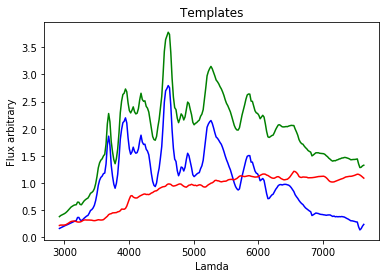

In [71]:
plt.plot(lam, sn_interp(lam),'b')
plt.plot(lam, hg_interp(lam),'r')
plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Templates')
plt.show()

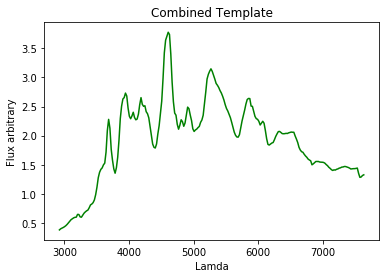

236


In [69]:
#Combined template

plt.plot(lam, combined_spectra,'g')
plt.ylabel('Flux arbitrary')
plt.xlabel('Lamda')
plt.title('Combined Template')
plt.show()

print(len(combined_spectra))


# Open to test

In [70]:
spectrum = np.loadtxt("/Users/user/Desktop/ssf/superfit/rebinned/combined/sn1991t.p15.Sa")
print(result)


lam_bin        bin_flux      
------- ---------------------
 1110.0                   0.0
 1130.0                   0.0
 1150.0                   0.0
 1170.0                   0.0
 1190.0 0.0028998787263528687
 1210.0  0.020283244333986407
 1230.0   0.03896901689204839
 1250.0   0.05704230687599335
 1270.0   0.06873516703042398
 1290.0   0.06547764924260685
    ...                   ...
11790.0     1.027572520635204
11810.0    1.0275453205103404
11830.0     1.027707163088645
11850.0    1.0280580116627969
11870.0    1.0285813479383443
11890.0    1.0291554871461608
11910.0    1.0297297364759401
11930.0     1.030236517749715
11950.0     1.030517512291997
11970.0     1.030774683782948
11990.0    1.0303358049351428
Length = 545 rows
